In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
pd.set_option('display.max_rows', 144)



In [18]:
## read json file "competitions.json"

data = json.load(open("/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/competitions.json"))


In [19]:
from pandas import json_normalize


df = json_normalize(data, sep = "_")
df.sort_values(by = "season_id", inplace = True)

In [20]:
print(df["competition_name"].unique())
print(df["season_name"].unique())  

## create a new column with the name of the competition and the season
df["competition_season"] = df["competition_name"] + "_" + df["season_name"]

['La Liga' 'Champions League' 'NWSL' 'FIFA World Cup'
 "FA Women's Super League" 'Ligue 1' 'Premier League' 'Serie A'
 '1. Bundesliga' "Women's World Cup" 'UEFA Euro' 'Liga Profesional'
 'North American League' 'UEFA Europa League' 'Copa del Rey'
 "UEFA Women's Euro" 'Major League Soccer' 'Indian Super league'
 'FIFA U20 World Cup']
['2017/2018' '2016/2017' '2018' '2018/2019' '2009/2010' '2010/2011'
 '2011/2012' '2012/2013' '2013/2014' '2014/2015' '2015/2016' '2019'
 '2004/2005' '2005/2006' '2006/2007' '2007/2008' '2008/2009' '2019/2020'
 '2020' '2003/2004' '1997/1998' '1974' '1986' '1990' '1977' '1971/1972'
 '1988/1989' '1999/2000' '1983/1984' '1986/1987' '2020/2021' '2022' '2023'
 '2021/2022' '2022/2023' '1982/1983' '1958' '1962' '1970' '1979' '1981'
 '1970/1971' '1972/1973' '1973/1974' '1977/1978']


In [21]:
df["competition_season"].unique().shape

(70,)

In [22]:
# matches = json.load(open("/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/11/22.json"))
# faire une boucle pour tous les matchs /Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/

import os

# Chemin du répertoire
dir_path = "/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/"

# Créer un DataFrame vide
matches = pd.DataFrame()

# Parcourir tous les sous-dossiers et fichiers
for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        # Vérifier si le fichier est un fichier .json
        if file.endswith(".json"):
            # Construire le chemin complet du fichier
            filepath = subdir + os.sep + file

            # Ouvrir le fichier et charger les données JSON
            with open(filepath, 'r') as f:
                data = json.load(f)

            # Aplatir les données et les ajouter au DataFrame
            flattened_data = pd.json_normalize(data)
            matches = pd.concat([matches, flattened_data], ignore_index=True)


In [23]:
matches["match_date"] = pd.to_datetime(matches["match_date"])

In [24]:
matches["competition_season"] = matches["competition.competition_name"] + "_" + matches["season.season_name"]
matches["competition_season"].unique()

array(['UEFA Europa League_1988/1989', 'Indian Super league_2021/2022',
       '1. Bundesliga_2015/2016', 'La Liga_2008/2009',
       'La Liga_2007/2008', 'La Liga_2004/2005', 'La Liga_2009/2010',
       'La Liga_2014/2015', 'La Liga_2015/2016', 'La Liga_2017/2018',
       'La Liga_2016/2017', 'La Liga_2020/2021', 'La Liga_2012/2013',
       'La Liga_1973/1974', 'La Liga_2013/2014', 'La Liga_2010/2011',
       'La Liga_2005/2006', 'La Liga_2018/2019', 'La Liga_2019/2020',
       'La Liga_2006/2007', 'La Liga_2011/2012', 'Ligue 1_2021/2022',
       'Ligue 1_2022/2023', 'Champions League_2008/2009',
       'Champions League_2004/2005', 'Champions League_2009/2010',
       'Champions League_1972/1973', 'Champions League_2014/2015',
       'Champions League_1971/1972', 'Champions League_2015/2016',
       'Champions League_2017/2018', 'Champions League_1970/1971',
       'Champions League_2016/2017', 'Champions League_2012/2013',
       'Champions League_2013/2014', 'Champions League_2003/

In [25]:
#matches = pd.json_normalize(matches)


In [26]:
compet = ["Premier League_2015/2016", "Champions League_2015/2016", "La Liga_2015/2016", "Serie A_2015/2016", "Bundesliga_2015/2016", 
          "FIFA World Cup_2022", 'Ligue 1_2021/2022',
       'Ligue 1_2022/2023']

matches = matches[matches["competition_season"].isin(compet)]
matches["competition_season"].unique()

array(['La Liga_2015/2016', 'Ligue 1_2021/2022', 'Ligue 1_2022/2023',
       'Champions League_2015/2016', 'FIFA World Cup_2022',
       'Serie A_2015/2016', 'Premier League_2015/2016'], dtype=object)

In [27]:
id_matchs = matches["match_id"].unique()
# to string
id_matchs = id_matchs.astype(str)
# add .json
id_matchs = [x + ".json" for x in id_matchs]


In [28]:
matches["match_outcome"] = matches["home_score"]-matches["away_score"]

In [29]:
import os
# Chemin du répertoire
dir_path = "/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/" + "events" #A MODIFIER

events = pd.DataFrame()

for roots, dirs, files in os.walk(dir_path):
    for file in id_matchs:
        filepath = roots + os.sep + file
        with open(filepath, 'r') as f: #A MODIFIER
            data = json.load(f)
        flattened_data = pd.json_normalize(data)


        # récupère le match_id, la competition_season et la match_date
        match_id = file.split(".")[0]
        competition_season = matches[matches["match_id"] == int(match_id)]["competition_season"]
        match_date = matches[matches["match_id"] == int(match_id)]["match_date"]
        match_outcome = matches[matches["match_id"] == int(match_id)]["match_outcome"]
        home_team = matches[matches["match_id"] == int(match_id)]["home_team.home_team_name"]
        away_team = matches[matches["match_id"] == int(match_id)]["away_team.away_team_name"]
        away_score = matches[matches["match_id"] == int(match_id)]["away_score"]
        home_score = matches[matches["match_id"] == int(match_id)]["home_score"]
        

        flattened_data["match_id"] = match_id
        flattened_data["competition_season"] = competition_season.tolist()[0]
        flattened_data["match_date"] = match_date.tolist()[0]
        flattened_data["match_outcome"] = match_outcome.tolist()[0]
        flattened_data["home_team"] = home_team.tolist()[0]
        flattened_data["away_team"] = away_team.tolist()[0]
        flattened_data["away_score"] = away_score.tolist()[0]
        flattened_data["home_score"] = home_score.tolist()[0]


        # met les colonnes match_id, competition_season et match_date en premier
        cols = flattened_data.columns.tolist()
        cols = cols[-8:] + cols[:-8]
        flattened_data = flattened_data[cols]
        
        #print(file+"  " +str(len(id_matchs) - id_matchs.index(file)))
        events = pd.concat([events, flattened_data], ignore_index=True)

## stock le dataframe dans un fichier csv dans le dossier Datacamp
events.to_csv("/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp/events.csv", index = False)

In [63]:
event = pd.read_csv("/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp/events.csv")

/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_38665/2142140321.py:1: DtypeWarning: Columns (46,52,57,61,63,68,69,72,98,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122,124,125,126,127,128,129,130,131,132,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150) have mixed types. Specify dtype option on import or set low_memory=False.
  event = pd.read_csv("/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp/events.csv")


In [64]:
events = event[event["competition_season"] == "FIFA World Cup_2022"]

In [65]:
events[events["type.name"]=="Shot"][["match_id", "team.name", "shot.statsbomb_xg", "shot.end_location", "shot.outcome.name"]]

,match_id,team.name,shot.statsbomb_xg,shot.end_location,shot.outcome.name
1091968,3857256,Switzerland,0.036566,"[108.2, 38.5]",Blocked
1091973,3857256,Switzerland,0.353289,"[114.8, 40.6, 1.6]",Saved
1091976,3857256,Switzerland,0.069527,"[115.5, 39.1, 1.0]",Saved
1092144,3857256,Serbia,0.081609,"[120.0, 35.3, 3.5]",Off T
1092304,3857256,Serbia,0.030002,"[120.0, 36.1, 0.6]",Post
...,...,...,...,...,...
1325766,3857254,Denmark,0.568312,"[120.0, 44.1, 1.1]",Post
1325997,3857254,Denmark,0.028724,"[120.0, 33.7, 0.5]",Off T
1326490,3857254,Denmark,0.145394,"[119.2, 39.4, 2.1]",Saved
1326521,3857254,Denmark,0.028684,"[96.4, 30.9]",Blocked


In [84]:
events["shot.type.name"].unique()

array([nan, 'Open Play', 'Corner', 'Free Kick', 'Penalty'], dtype=object)

In [66]:
events = events[events["period"] <= 4]
eventsfinal = events[events["match_date"] == "2022-12-18"]

In [67]:
events.competition_season.unique()

array(['FIFA World Cup_2022'], dtype=object)

In [68]:
player_values_counts = events["player.name"].value_counts()
player_values_counts.to_csv('player_values_counts.csv', index=True)

In [69]:
lineup = events[events["type.name"] == "Starting XI"]
# pd.json_normalize(lineup["tactics.lineup"][0])
lineup.shape

(128, 151)

In [70]:
# tous les attributs contenant goalkeeper
goalkeeper_columns = events.columns[events.columns.str.contains("goalkeeper")]

# for col in range(1,len(goalkeeper_columns)):
#     print(goalkeeper_columns[col])
#     print(events[goalkeeper_columns[col]].unique())

goalkeeper = eventsfinal[(eventsfinal["type.name"] == "Goal Keeper")]
goalkeeper[(goalkeeper["goalkeeper.type.name"] == "Goal Conceded") | (goalkeeper["goalkeeper.type.name"] == "Penalty Conceded")]


,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.outcome.id,pass.outcome.name,counterpress,under_pressure,dribble.outcome.id,dribble.outcome.name,dribble.overrun,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,clearance.head,pass.cross,pass.cut_back,interception.outcome.id,interception.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,off_camera,out,duel.type.id,duel.type.name,pass.aerial_won,pass.switch,clearance.aerial_won,duel.outcome.id,duel.outcome.name,ball_recovery.recovery_failure,foul_committed.card.id,foul_committed.card.name,pass.through_ball,pass.technique.id,pass.technique.name,clearance.left_foot,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.freeze_frame,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.end_location,foul_won.defensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,shot.first_time,shot.one_on_one,pass.outswinging,miscontrol.aerial_won,pass.inswinging,pass.deflected,pass.goal_assist,clearance.other,pass.no_touch,block.offensive,block.deflection,injury_stoppage.in_chain,block.save_block,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,foul_committed.type.id,foul_committed.type.name,shot.aerial_won,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,shot.open_goal,ball_recovery.offensive,pass.straight,goalkeeper.punched_out,pass.miscommunication,shot.saved_to_post,goalkeeper.shot_saved_to_post,50_50.outcome.id,50_50.outcome.name,shot.saved_off_target,goalkeeper.shot_saved_off_target,player_off.permanent,dribble.no_touch,foul_committed.penalty,foul_won.penalty,shot.follows_dribble,goalkeeper.success_in_play,goalkeeper.lost_in_play,goalkeeper.success_out,shot.redirect,goalkeeper.lost_out,goalkeeper.penalty_saved_to_post,half_start.late_video_start,goalkeeper.saved_to_post,half_end.early_video_end
1125070,3869685,FIFA World Cup_2022,2022-12-18,0,c9b8e568-dcdc-4302-9683-0e9e9a55a42a,772,1,00:22:24.740,22,24,32,0.0,23,Goal Keeper,779,Argentina,5,Other,771,France,NaN,NaN,['6d527ebc-a948-4cd8-ac82-daced35bb715'],"[1.0, 40.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,No Touch,28.0,Penalty Conceded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Diving,44.0,Set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125477,3869685,FIFA World Cup_2022,2022-12-18,0,07ff403e-90ed-4589-8dc1-d9ac61050632,1179,1,00:35:23.113,35,23,52,0.0,23,Goal Keeper,779,Argentina,1,Regular Play,771,France,NaN,NaN,['ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe'],"[5.5, 45.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,No Touch,

In [71]:
fouls = events[(events["type.name"]== "Foul Won")& (events["match_date"] == "2022-12-18") & (events["team.name"] == "Argentina")]
fouls_commited = events[(events["type.name"]== "Foul Committed")& (events["match_date"] == "2022-12-18")]

# convert the string to a list column location with eval
fouls["location"] = fouls["location"].apply(eval)


/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_38665/959208984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fouls["location"] = fouls["location"].apply(eval)


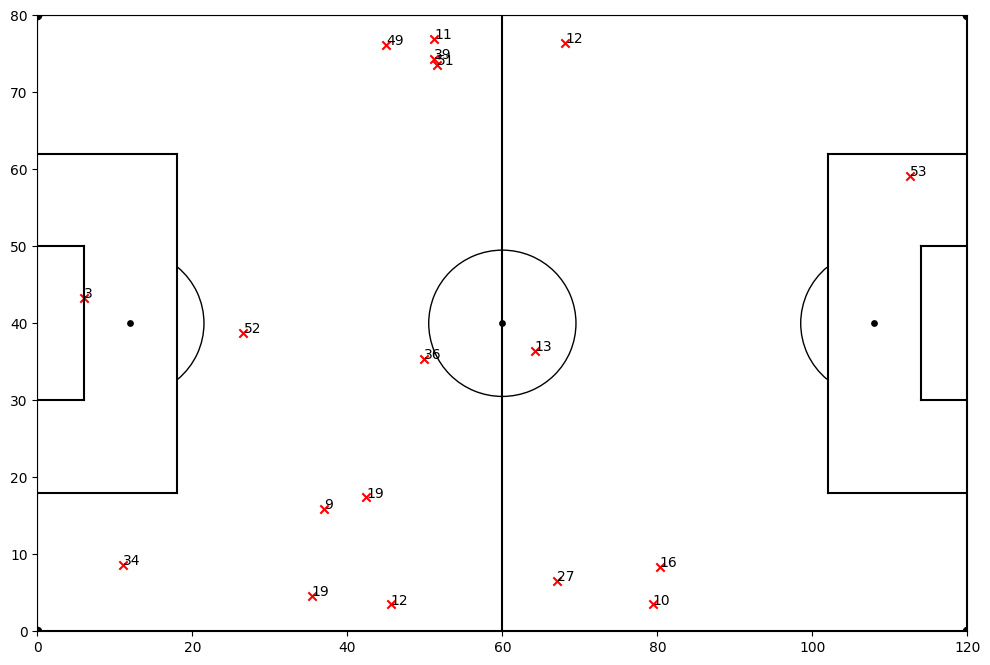

In [72]:
from field import plot_field
# fais un terrain de foot avec toutes les lignes (surfaces, ...) de 80m x 120m
fig,ax = plt.subplots(figsize=(12,8))

plot_field(ax)

# placer toutes les fautes sur le terrain
ax.set_xlim([0,120])
ax.set_ylim([0,80])

for i in range(len(fouls)):
    x = float(fouls.iloc[i]["location"][0])
    y = 80 - float(fouls.iloc[i]["location"][1])
    ax.scatter(x,y, color = "red", marker="x")
    #ax.annotate(fouls.iloc[i]["player.name"], (x,y), color = "red")
    ax.annotate(fouls.iloc[i]["second"], (x,y), color = "black")


In [73]:
# tous les attributs contenant pass
pass_columns = events.columns[events.columns.str.contains("pass")]

for col in range(1,len(pass_columns)):
    if (pass_columns[col] != "pass.recipient.name") & (pass_columns[col] != "pass.end_location") & (pass_columns[col] != "pass.assisted_shot_id") & (pass_columns[col] != "shot.key_pass_id"):
        print(pass_columns[col])
        print(events[pass_columns[col]].unique())


pass.length
[      nan 18.258423 26.826294 ... 73.71411  72.861786 79.32578 ]
pass.angle
[       nan 2.9431229  1.4737241  ... 0.05564901 0.04118549 0.27708754]
pass.height.id
[nan  1.  3.  2.]
pass.height.name
[nan 'Ground Pass' 'High Pass' 'Low Pass']
pass.body_part.id
[ nan  40.  38.  37.  69.  70. 106.  68.]
pass.body_part.name
[nan 'Right Foot' 'Left Foot' 'Head' 'Keeper Arm' 'Other' 'No Touch'
 'Drop Kick']
pass.type.id
[nan 65. 66. 67. 61. 63. 62. 64.]
pass.type.name
[nan 'Kick Off' 'Recovery' 'Throw-in' 'Corner' 'Goal Kick' 'Free Kick'
 'Interception']
pass.outcome.id
[nan  9. 75. 77. 76. 74.]
pass.outcome.name
[nan 'Incomplete' 'Out' 'Unknown' 'Pass Offside' 'Injury Clearance']
pass.cross
[nan True]
pass.cut_back
[nan True]
pass.aerial_won
[nan True]
pass.switch
[nan True]
pass.through_ball
[nan True]
pass.technique.id
[ nan 105. 108. 107. 104.]
pass.technique.name
[nan 'Outswinging' 'Through Ball' 'Straight' 'Inswinging']
pass.shot_assist
[nan True]
pass.outswinging
[nan True

In [74]:
events["position.name"].unique()

array([nan, 'Center Forward', 'Right Defensive Midfield', 'Right Back',
       'Right Center Back', 'Center Attacking Midfield', 'Left Wing',
       'Left Center Back', 'Left Defensive Midfield', 'Goalkeeper',
       'Right Wing', 'Right Wing Back', 'Center Back', 'Left Back',
       'Left Wing Back', 'Left Center Forward', 'Right Center Forward',
       'Substitute', 'Right Midfield', 'Center Defensive Midfield',
       'Right Center Midfield', 'Left Midfield', 'Left Center Midfield',
       'Left Attacking Midfield', 'Right Attacking Midfield'],
      dtype=object)

In [75]:
dissposs = eventsfinal[(eventsfinal["type.name"] == "Injury Stoppage") & (eventsfinal["player.name"] == "Damián Emiliano Martínez")]
dissposs

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.outcome.id,pass.outcome.name,counterpress,under_pressure,dribble.outcome.id,dribble.outcome.name,dribble.overrun,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,clearance.head,pass.cross,pass.cut_back,interception.outcome.id,interception.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,off_camera,out,duel.type.id,duel.type.name,pass.aerial_won,pass.switch,clearance.aerial_won,duel.outcome.id,duel.outcome.name,ball_recovery.recovery_failure,foul_committed.card.id,foul_committed.card.name,pass.through_ball,pass.technique.id,pass.technique.name,clearance.left_foot,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.freeze_frame,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.end_location,foul_won.defensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,shot.first_time,shot.one_on_one,pass.outswinging,miscontrol.aerial_won,pass.inswinging,pass.deflected,pass.goal_assist,clearance.other,pass.no_touch,block.offensive,block.deflection,injury_stoppage.in_chain,block.save_block,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,foul_committed.type.id,foul_committed.type.name,shot.aerial_won,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,shot.open_goal,ball_recovery.offensive,pass.straight,goalkeeper.punched_out,pass.miscommunication,shot.saved_to_post,goalkeeper.shot_saved_to_post,50_50.outcome.id,50_50.outcome.name,shot.saved_off_target,goalkeeper.shot_saved_off_target,player_off.permanent,dribble.no_touch,foul_committed.penalty,foul_won.penalty,shot.follows_dribble,goalkeeper.success_in_play,goalkeeper.lost_in_play,goalkeeper.success_out,shot.redirect,goalkeeper.lost_out,goalkeeper.penalty_saved_to_post,half_start.late_video_start,goalkeeper.saved_to_post,half_end.early_video_end
1124657,3869685,FIFA World Cup_2022,2022-12-18,0,e5a4e3e0-5f09-4169-8acc-cba724138019,359,1,00:09:25.483,9,25,19,0.0,40,Injury Stoppage,779,Argentina,2,From Corner,779,Argentina,NaN,NaN,NaN,NaN,6909.0,Damián Emiliano Martínez,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
events["duel.type.name"].value_counts()

duel.type.name
Aerial Lost    2204
Tackle         2185
Name: count, dtype: int64

In [77]:
pass_griezmann = events[(events["player.name"] == "Antoine Griezmann") & (events["type.name"] == "Pass") & (events["match_date"] == "2022-12-18")]
pass_griezmann.shape
# pass != nan
#pass_griezmann[pass_griezmann["pass.outcome.name"].notnull()]
pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape
#pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape[0]/pass_griezmann.shape[0]


duels_theo = events[((events["player.name"] == "Jules Koundé") | (events["player.name"] == "Nicolás Hernán Otamendi") ) & (events["type.name"] == "Duel") & (events["match_date"] == "2022-12-18")]
duels_theo[["player.name","minute", "second", "duel.outcome.name", "duel.type.name"]]
eventsfinal[(eventsfinal["minute"] == 122)& (eventsfinal["second"] > 0)][["player.name","type.name","second", "clearance.aerial_won","clearance.body_part.name","pass.outcome.name"]]

# j'aimerais avoir un count des uniques values de "type.name" pour Kylian Mbappé Lottin
print(events[(events["player.name"] == "Kylian Mbappé Lottin")]["type.name"].value_counts())

events[(events["type.name"] == "Duel")& (events["duel.outcome.name"]== "Won")].groupby("player.name").size().sort_values(ascending = False).head(10)


type.name
Ball Receipt*      361
Carry              298
Pass               233
Dribble             50
Pressure            37
Shot                31
Ball Recovery       30
Miscontrol          21
Dispossessed        17
Foul Won            10
Foul Committed       8
Duel                 6
Block                2
Interception         1
Dribbled Past        1
Injury Stoppage      1
Player Off           1
Player On            1
Name: count, dtype: int64


player.name
Jurriën David Norman Timber        7
Sofyan Amrabat                     7
Theo Bernard François Hernández    6
Ivan Perišić                       6
Daley Blind                        6
Mateo Kovačić                      6
Pierre-Emile Højbjerg              5
Eduardo Camavinga                  5
Enzo Fernandez                     5
Jude Bellingham                    5
dtype: int64

In [78]:
assist_counts = events[events["pass.assisted_shot_id"].notnull()].groupby("player.name").size()
players_with_more_than_two_assists = assist_counts[assist_counts > 25].index.tolist()

players_with_more_than_two_assists

[]

In [79]:
# pass_griezmann = events[(events["player.name"] == "Antoine Griezmann") & (events["type.name"] == "Pass") & (events["match_date"] == "2022-12-18")]
# pass_griezmann.shape
# # pass != nan
# #pass_griezmann[pass_griezmann["pass.outcome.name"].notnull()]
# pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape
# #pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape[0]/pass_griezmann.shape[0]

def get_passes_before_date(player_name, match_date, events):
    # Récupérer les passes du joueur
    player_passes = events[(events["player.name"] == player_name) & (events["type.name"] == "Pass") & (events["match_date"] < match_date)]
    # Récupérer les passes réussies

    player_successful_passes_percentage = player_passes[player_passes["pass.outcome.name"].isnull()].shape[0]/player_passes.shape[0]

    return player_successful_passes_percentage

In [80]:
goalkeepers = ["Goalkeeper"]
defensive_players = ["Right Center Back", "Left Center Back", "Right Back", "Left Back",'Center Back','Left Defensive Midfield', 'Right Defensive Midfield', "Right Wing Back",'Left Wing Back',]
midfielders = ["Right Midfield", "Left Midfield", "Center Midfield", "Right Center Midfield", "Left Center Midfield"]
offensive_players = ['Center Forward', "Right Wing", "Left Wing", 'Center Attacking Midfield', 'Left Center Forward', 'Right Center Forward','Left Attacking Midfield', 'Right Attacking Midfield']

In [81]:

def extract_player_names(tactics_lineup):
    if isinstance(tactics_lineup, str):
        tactics_lineup = json.loads(tactics_lineup.replace("'", '"'))
    return [player["player"]["name"] for player in tactics_lineup]

def extract_player_position(tactics_lineup):
    if isinstance(tactics_lineup, str):
        tactics_lineup = json.loads(tactics_lineup)
    return [player["position"]["name"] for player in tactics_lineup]

In [82]:
team1_lineup = lineup["tactics.lineup"].iloc[0]
team2_lineup = lineup["tactics.lineup"].iloc[0 + 1]

player_names = extract_player_names(team1_lineup) + extract_player_names(team2_lineup)
type(player_names)

list

In [83]:
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# Créer le DataFrame initial
startingXI = pd.DataFrame(columns=["match_id", "competition_season", "match_date", "match_outcome", "player_1", "player_2", "player_3", "player_4", "player_5", "player_6", "player_7", "player_8", "player_9", "player_10", "player_11", "player_12", "player_13", "player_14", "player_15", "player_16", "player_17", "player_18", "player_19", "player_20", "player_21", "player_22"])


# Créer un dictionnaire pour stocker les buts de chaque joueur avant chaque date de match

player_goals_cache = {}
player_appearances_cache = {}
player_assist_cache = {}
player_keypass_cache = {}
player_clearance_cache = {}

for match_date in lineup['match_date'].unique():
    lineups_for_date = lineup[lineup["match_date"] == match_date]["tactics.lineup"]
    match_goals = events[(events["shot.outcome.name"] == "Goal") & 
                         (events['match_date'] < match_date)]

    goals_conceded = events[((events["goalkeeper.type.name"] == "Goal Conceded") | (events["goalkeeper.type.name"] == "Penalty Conceded"))
                             &
                            (events['match_date'] < match_date)]
    match_keypass = events[(events["type.name"] == "Pass") & (events["pass.assisted_shot_id"].notnull()) & (events['match_date'] < match_date)]
    match_assists = events[(events["type.name"] == "Pass") & (events["pass.goal_assist"] == True) & (events['match_date'] < match_date)]
    match_clearance = events[(events["type.name"] == "Clearance") & (events['match_date'] < match_date)]
    match_recovers = events[(events["type.name"] == "Ball Recovery") & (events['match_date'] < match_date)]
    match_duels = events[(events["type.name"] == "Duel") & (events["duel.outcome.name"] == "Won")& (events['match_date'] < match_date)]
    match_blocks = events[(events["type.name"] == "Block") & (events['match_date'] < match_date)]

    
    lineups_for_date.apply(lambda x: eval(x))


    for tactics_lineup in lineups_for_date:
        # Assurez-vous que tactics_lineup est une liste avant de l'envoyer à la fonction
        tactics_lineup = eval(tactics_lineup)

        if isinstance(tactics_lineup, list):
            player_names = extract_player_names(tactics_lineup)
            player_positions = extract_player_position(tactics_lineup)
            player_to_position = dict(zip(player_names, player_positions))

            for player, position in player_to_position.items():
                player_appearances_cache[(player, match_date)] = events[(events["player.name"] == player) & (events['match_date'] < match_date)].groupby('match_id').first().reset_index().shape[0]
                player_assist_cache[(player, match_date)] = match_assists[match_assists["player.name"] == player].shape[0]
                player_keypass_cache[(player, match_date)] = match_keypass[match_keypass["player.name"] == player].shape[0]
                if position == 'Goalkeeper':
                    player_goals_cache[(player, match_date)] = goals_conceded[goals_conceded["player.name"] == player].shape[0]
                elif position in defensive_players:
                    player_goals_cache[(player, match_date)] = (
                        (match_clearance[match_clearance["player.name"] == player].shape[0])*0.2) + (
                            (match_recovers[match_recovers["player.name"] == player].shape[0])*0.3) + (
                                (match_duels[match_duels["player.name"] == player].shape[0])*0.3) + (
                                    (match_blocks[match_blocks["player.name"] == player].shape[0])*0.2)
                else:
                    player_goals_cache[(player, match_date)] = match_goals[match_goals["player.name"] == player].shape[0]
                                    




In [45]:
for i in range(0, len(lineup), 2):
    # Extraire les informations pour les deux équipes
    team1_lineup = lineup["tactics.lineup"].iloc[i]
    team2_lineup = lineup["tactics.lineup"].iloc[i + 1]

    team1_lineup = eval(team1_lineup)
    team2_lineup = eval(team2_lineup)

    # Vérifier que chaque équipe a 11 joueurs
    if len(team1_lineup) < 11 or len(team2_lineup) < 11:
        continue  # ou gérer l'erreur comme vous le souhaitez

    player_names = extract_player_names(team1_lineup) + extract_player_names(team2_lineup)
    player_positions = extract_player_position(team1_lineup) + extract_player_position(team2_lineup)
    lineup_data = {
        "match_id": lineup["match_id"][i], 
        "competition_season": lineup["competition_season"][i], 
        "match_date": lineup["match_date"][i],
        "match_outcome": lineup["match_outcome"][i],
        **{f"player_{j+1}": player_names[j] for j in range(22)},
        **{f"player_{j+1}_position": player_positions[j] for j in range(22)},
        **{
            f"player_{j+1}_goals": (
                player_goals_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            },
        **{
            f"player_{j+1}_assists": (
                player_assist_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            },
        **{
            f"player_{j+1}_keypass": (
                player_keypass_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            }
    }

    Newlineup = pd.DataFrame([lineup_data])
    startingXI = pd.concat([startingXI, Newlineup], ignore_index=True)

KeyError: 0

In [ ]:
startingXI[startingXI["match_date"] > "2022-12-12"]

,match_id,competition_season,match_date,match_outcome,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,player_10,player_11,player_12,player_13,player_14,player_15,player_16,player_17,player_18,player_19,player_20,player_21,player_22,player_1_position,player_2_position,player_3_position,player_4_position,player_5_position,player_6_position,player_7_position,player_8_position,player_9_position,player_10_position,player_11_position,player_12_position,player_13_position,player_14_position,player_15_position,player_16_position,player_17_position,player_18_position,player_19_position,player_20_position,player_21_position,player_22_position,player_1_goals,player_2_goals,player_3_goals,player_4_goals,player_5_goals,player_6_goals,player_7_goals,player_8_goals,player_9_goals,player_10_goals,player_11_goals,player_12_goals,player_13_goals,player_14_goals,player_15_goals,player_16_goals,player_17_goals,player_18_goals,player_19_goals,player_20_goals,player_21_goals,player_22_goals,player_1_assists,player_2_assists,player_3_assists,player_4_assists,player_5_assists,player_6_assists,player_7_assists,player_8_assists,player_9_assists,player_10_assists,player_11_assists,player_12_assists,player_13_assists,player_14_assists,player_15_assists,player_16_assists,player_17_assists,player_18_assists,player_19_assists,player_20_assists,player_21_assists,player_22_assists,player_1_keypass,player_2_keypass,player_3_keypass,player_4_keypass,player_5_keypass,player_6_keypass,player_7_keypass,player_8_keypass,player_9_keypass,player_10_keypass,player_11_keypass,player_12_keypass,player_13_keypass,player_14_keypass,player_15_keypass,player_16_keypass,player_17_keypass,player_18_keypass,player_19_keypass,player_20_keypass,player_21_keypass,player_22_keypass
9,3869685,FIFA World Cup_2022,2022-12-18,0,Damián Emiliano Martínez,Nahuel Molina Lucero,Cristian Gabriel Romero,Nicolás Hernán Otamendi,Nicolás Alejandro Tagliafico,Enzo Fernandez,Rodrigo Javier De Paul,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,Ángel Fabián Di María Hernández,Julián Álvarez,Hugo Lloris,Jules Koundé,Raphaël Varane,Dayotchanculle Upamecano,Theo Bernard François Hernández,Aurélien Djani Tchouaméni,Adrien Rabiot,Ousmane Dembélé,Antoine Griezmann,Kylian Mbappé Lottin,Olivier Giroud,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,0.666667,1.366667,1.533333,2.383333,1.420000,0.166667,0.000,0.200000,0.833333,0.0,0.666667,0.8,1.600000,1.20,2.475,2.380,1.833333,2.02,0.00,0.000000,0.833333,0.800000,0.0,0.166667,0.0,0.166667,0.000000,0.166667,0.0,0.0,0.5,0.25,0.0,0.0,0.000000,0.0,0.0,0.4,0.0,0.2,0.333333,0.500000,0.333333,0.0,0.0,0.5,0.0,0.333333,0.20,0.833333,1.000000,1.4,2.833333,1.75,0.166667,0.0,0.400000,0.0,0.25,2.4,1.000000,0.4,2.00,3.166667,1.833333,0.400000
18,3869684,FIFA World Cup_2022,2022-12-17,1,Dominik Livaković,Josip Stanišić,Josip Šutalo,Joško Gvardiol,Ivan Perišić,Luka Modrić,Mateo Kovačić,Lovro Majer,Andrej Kramarić,Mislav Oršić,Marko Livaja,Yassine Bounou,Achraf Hakimi Mouh,Jawad El Yamiq,Achraf Dari,Yahia Attiyat allah,Sofyan Amrabat,Bilal El Khannous,Abdelhamid Sabiri,Hakim Ziyech,Sofiane Boufal,Youssef En-Nesyri,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,1.000000,0.000000,0.000000,3.366667,1.833333,2.133333,2.150,0.166667,0.333333,0.0,0.200000,0.4,2.883333,1.42,2.550,1.660,0.000000,0.00,0.00,0.166667,0.000000,0.333333,0.0,0.000000,0.0,0.

In [197]:

#remove the attributes player_1 to player_22
startingXI = startingXI.drop(startingXI.columns[4:26], axis=1)


,match_id,competition_season,match_date,match_outcome,player_1_position,player_2_position,player_3_position,player_4_position,player_5_position,player_6_position,player_7_position,player_8_position,player_9_position,player_10_position,player_11_position,player_12_position,player_13_position,player_14_position,player_15_position,player_16_position,player_17_position,player_18_position,player_19_position,player_20_position,player_21_position,player_22_position,player_1_goals,player_2_goals,player_3_goals,player_4_goals,player_5_goals,player_6_goals,player_7_goals,player_8_goals,player_9_goals,player_10_goals,player_11_goals,player_12_goals,player_13_goals,player_14_goals,player_15_goals,player_16_goals,player_17_goals,player_18_goals,player_19_goals,player_20_goals,player_21_goals,player_22_goals,player_1_assists,player_2_assists,player_3_assists,player_4_assists,player_5_assists,player_6_assists,player_7_assists,player_8_assists,player_9_assists,player_10_assists,player_11_assists,player_12_assists,player_13_assists,player_14_assists,player_15_assists,player_16_assists,player_17_assists,player_18_assists,player_19_assists,player_20_assists,player_21_assists,player_22_assists,player_1_keypass,player_2_keypass,player_3_keypass,player_4_keypass,player_5_keypass,player_6_keypass,player_7_keypass,player_8_keypass,player_9_keypass,player_10_keypass,player_11_keypass,player_12_keypass,player_13_keypass,player_14_keypass,player_15_keypass,player_16_keypass,player_17_keypass,player_18_keypass,player_19_keypass,player_20_keypass,player_21_keypass,player_22_keypass
9,3869685,FIFA World Cup_2022,2022-12-18,0,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,0.666667,1.366667,1.533333,2.383333,1.420000,0.166667,0.000,0.200000,0.833333,0.0,0.666667,0.8,1.600000,1.20,2.475,2.380,1.833333,2.02,0.00,0.000000,0.833333,0.800000,0.0,0.166667,0.0,0.166667,0.000000,0.166667,0.0,0.0,0.5,0.25,0.0,0.0,0.000000,0.0,0.0,0.4,0.0,0.2,0.333333,0.500000,0.333333,0.0,0.0,0.5,0.0,0.333333,0.20,0.833333,1.000000,1.4,2.833333,1.75,0.166667,0.0,0.400000,0.0,0.25,2.4,1.000000,0.4,2.00,3.166667,1.833333,0.400000
18,3869684,FIFA World Cup_2022,2022-12-17,1,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,1.000000,0.000000,0.000000,3.366667,1.833333,2.133333,2.150,0.166667,0.333333,0.0,0.200000,0.4,2.883333,1.42,2.550,1.660,0.000000,0.00,0.00,0.166667,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.40,0.0,0.0,0.166667,0.0,0.0,0.2,0.0,0.0,0.250000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.166667,1.00,1.000000,1.333333,0.0,0.666667,0.80,0.200000,0.0,0.666667,0.0,0.00,0.6,0.333333,0.0,0.75,1.000000,0.666667,0.166667
19,3869519,FIFA World Cup_2022,2022-12-13,3,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Midfield,Left Midfield,Right Center Forward,Left Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,0.800000,1.540000,1.300000,2.500000,1.125000,0.833333,1.780,0.000000,0.250000,0.8,0.400000,0.6,2.920000,2.34,3.420,2.225,0.000000,0.00,0.00,0.000000,0.200000,0.400000,0.0,0.200000,0.0,0.200000,0.000000,0.000000,0.2,0.0,0.0,0.40,0.0,0.0,0.200000,0.2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.400000,0.0,0.0,0.6,0.0,0.400000,0.25,0.666667,0.800000,1.0,1.250000,3.

In [198]:
startingXI[startingXI["match_date"] > "2022-12-12"]

,match_id,competition_season,match_date,match_outcome,player_1_position,player_2_position,player_3_position,player_4_position,player_5_position,player_6_position,player_7_position,player_8_position,player_9_position,player_10_position,player_11_position,player_12_position,player_13_position,player_14_position,player_15_position,player_16_position,player_17_position,player_18_position,player_19_position,player_20_position,player_21_position,player_22_position,player_1_goals,player_2_goals,player_3_goals,player_4_goals,player_5_goals,player_6_goals,player_7_goals,player_8_goals,player_9_goals,player_10_goals,player_11_goals,player_12_goals,player_13_goals,player_14_goals,player_15_goals,player_16_goals,player_17_goals,player_18_goals,player_19_goals,player_20_goals,player_21_goals,player_22_goals,player_1_assists,player_2_assists,player_3_assists,player_4_assists,player_5_assists,player_6_assists,player_7_assists,player_8_assists,player_9_assists,player_10_assists,player_11_assists,player_12_assists,player_13_assists,player_14_assists,player_15_assists,player_16_assists,player_17_assists,player_18_assists,player_19_assists,player_20_assists,player_21_assists,player_22_assists,player_1_keypass,player_2_keypass,player_3_keypass,player_4_keypass,player_5_keypass,player_6_keypass,player_7_keypass,player_8_keypass,player_9_keypass,player_10_keypass,player_11_keypass,player_12_keypass,player_13_keypass,player_14_keypass,player_15_keypass,player_16_keypass,player_17_keypass,player_18_keypass,player_19_keypass,player_20_keypass,player_21_keypass,player_22_keypass
9,3869685,FIFA World Cup_2022,2022-12-18,0,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,0.666667,1.366667,1.533333,2.383333,1.420000,0.166667,0.000,0.200000,0.833333,0.0,0.666667,0.8,1.600000,1.20,2.475,2.380,1.833333,2.02,0.00,0.000000,0.833333,0.800000,0.0,0.166667,0.0,0.166667,0.000000,0.166667,0.0,0.0,0.5,0.25,0.0,0.0,0.000000,0.0,0.0,0.4,0.0,0.2,0.333333,0.500000,0.333333,0.0,0.0,0.5,0.0,0.333333,0.20,0.833333,1.000000,1.4,2.833333,1.75,0.166667,0.0,0.400000,0.0,0.25,2.4,1.000000,0.4,2.00,3.166667,1.833333,0.400000
18,3869684,FIFA World Cup_2022,2022-12-17,1,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,1.000000,0.000000,0.000000,3.366667,1.833333,2.133333,2.150,0.166667,0.333333,0.0,0.200000,0.4,2.883333,1.42,2.550,1.660,0.000000,0.00,0.00,0.166667,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.40,0.0,0.0,0.166667,0.0,0.0,0.2,0.0,0.0,0.250000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.166667,1.00,1.000000,1.333333,0.0,0.666667,0.80,0.200000,0.0,0.666667,0.0,0.00,0.6,0.333333,0.0,0.75,1.000000,0.666667,0.166667
19,3869519,FIFA World Cup_2022,2022-12-13,3,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Midfield,Left Midfield,Right Center Forward,Left Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,0.800000,1.540000,1.300000,2.500000,1.125000,0.833333,1.780,0.000000,0.250000,0.8,0.400000,0.6,2.920000,2.34,3.420,2.225,0.000000,0.00,0.00,0.000000,0.200000,0.400000,0.0,0.200000,0.0,0.200000,0.000000,0.000000,0.2,0.0,0.0,0.40,0.0,0.0,0.200000,0.2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.400000,0.0,0.0,0.6,0.0,0.400000,0.25,0.666667,0.800000,1.0,1.250000,3.

In [211]:
## encoder les positions et les noms des joueurs

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in startingXI.columns:
    if col.endswith("position"):
        startingXI[col] = le.fit_transform(startingXI[col])
    elif col.startswith("player"):
        startingXI[col] = le.fit_transform(startingXI[col])

startingXI["match_outcome"] = startingXI["match_outcome"].astype(int)
# mettre 1 si victoire, -1 si défaite et 0 si nul
startingXI["match_outcome"] = startingXI["match_outcome"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


In [212]:
## predit match outcome avec startingXI

X_train, X_test, y_train, y_test = train_test_split(startingXI.drop(["match_id", "competition_season", "match_date", "match_outcome"], axis = 1), startingXI["match_outcome"], test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)




0.46153846153846156

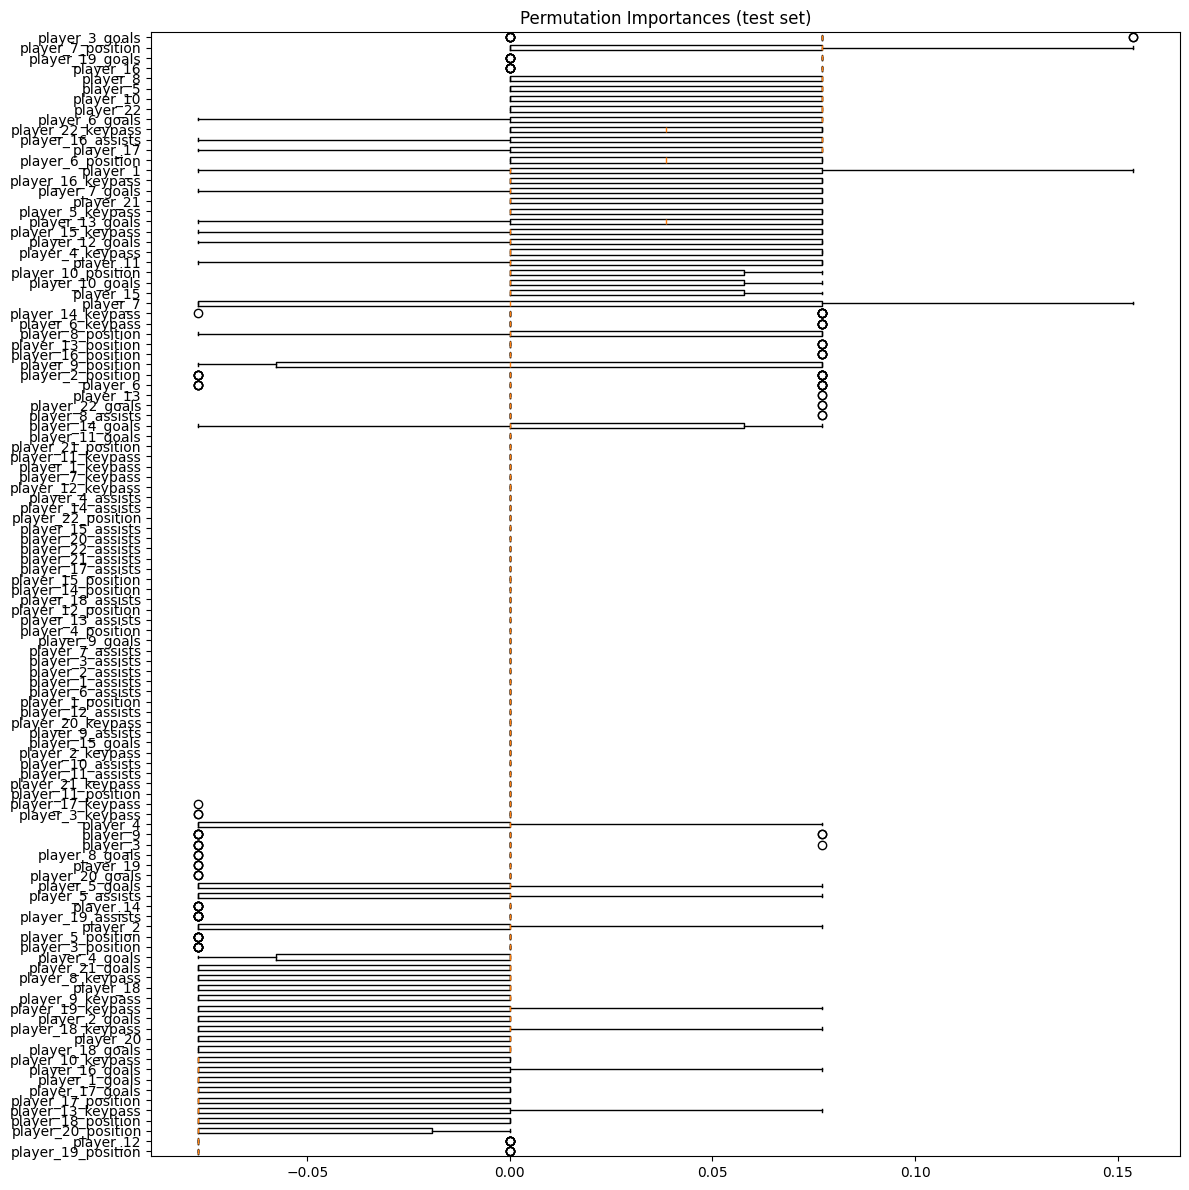

In [219]:
fig, ax = plt.subplots(figsize=(12,12))
ax.boxplot(permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42).importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

Accuracy: 0.38461538461538464
              precision    recall  f1-score   support

          -1       0.50      0.40      0.44         5
           0       0.33      0.50      0.40         2
           1       0.33      0.33      0.33         6

    accuracy                           0.38        13
   macro avg       0.39      0.41      0.39        13
weighted avg       0.40      0.38      0.39        13



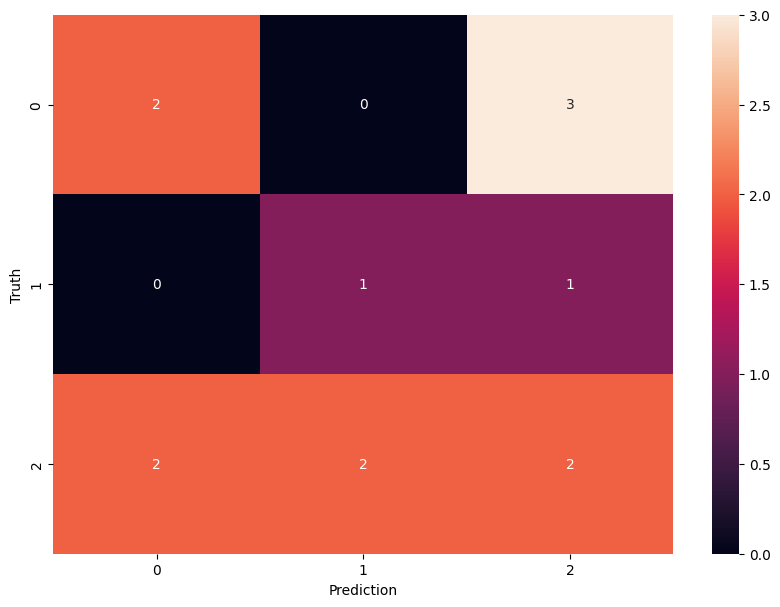

In [207]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Truth')



print("Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
eventsfinal.shape

(4386, 146)

In [2]:
event["match_id"].unique().shape

NameError: name 'event' is not defined